In [1]:
import pandas as pd
import numpy as np

In [13]:
book_data = pd.read_csv('recommendation_data/Books.csv')
book_data.head()

C:\Users\ABC\AppData\Local\Temp\ipykernel_13708\44341108.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  book_data = pd.read_csv('recommendation_data/Books.csv')


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [14]:
book_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [20]:
book_data.shape

(271360, 8)

In [12]:
user_data = pd.read_csv('recommendation_data/Users.csv')
user_data.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [15]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [17]:
user_data.shape

(278858, 3)

In [18]:
rating_data = pd.read_csv('recommendation_data/Ratings.csv')
rating_data.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [19]:
rating_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [21]:
rating_data.shape

(1149780, 3)

<h1>Pre-Processing of Data</h1>

<h3>Working on Book Data</h3>

In [22]:
book_data.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis= 1, inplace= True)

In [23]:
# replacing '-' with '_' and features name in lower case
book_data.columns= book_data.columns.str.strip().str.lower().str.replace('-', '_')
user_data.columns= user_data.columns.str.strip().str.lower().str.replace('-', '_')
rating_data.columns= rating_data.columns.str.strip().str.lower().str.replace('-', '_')

In [24]:
book_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   isbn                 271360 non-null  object
 1   book_title           271360 non-null  object
 2   book_author          271358 non-null  object
 3   year_of_publication  271360 non-null  object
 4   publisher            271358 non-null  object
dtypes: object(5)
memory usage: 10.4+ MB


In [26]:
print(book_data.isnull().sum())

isbn                   0
book_title             0
book_author            2
year_of_publication    0
publisher              2
dtype: int64


In [27]:
book_data.loc[(book_data['book_author'].isnull()),: ]

,isbn,book_title,book_author,year_of_publication,publisher
118033,0751352497,A+ Quiz Masters:01 Earth,NaN,1999,Dorling Kindersley
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing


In [28]:
book_data.loc[(book_data['publisher'].isnull()),: ]

,isbn,book_title,book_author,year_of_publication,publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [29]:
book_data['year_of_publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [30]:
# Extracting and fixing mismatch in feature 'year_of_publication', 'publisher', 'book_author', 'book_title'
book_data[book_data['year_of_publication'] == 'DK Publishing Inc'] 

,isbn,book_title,book_author,year_of_publication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In [31]:
# Extracting and fixing mismatch in feature 'year_of_publication', 'publisher', 'book_author', 'book_title' 
book_data[book_data['year_of_publication'] == 'Gallimard']

,isbn,book_title,book_author,year_of_publication,publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...


In [32]:
book_data.loc[221678]

isbn                                                          0789466953
book_title             DK Readers: Creating the X-Men, How Comic Book...
book_author                                                         2000
year_of_publication                                    DK Publishing Inc
publisher              http://images.amazon.com/images/P/0789466953.0...
Name: 221678, dtype: object

In [33]:
book_data.loc[209538]

isbn                                                          078946697X
book_title             DK Readers: Creating the X-Men, How It All Beg...
book_author                                                         2000
year_of_publication                                    DK Publishing Inc
publisher              http://images.amazon.com/images/P/078946697X.0...
Name: 209538, dtype: object

In [34]:
book_data.loc[220731]

isbn                                                          2070426769
book_title             Peuple du ciel, suivi de 'Les Bergers\";Jean-M...
book_author                                                         2003
year_of_publication                                            Gallimard
publisher              http://images.amazon.com/images/P/2070426769.0...
Name: 220731, dtype: object

In [35]:
# function to fix mismatch data in feature 'book_title', 'book_author', ' year_of_publication', 'publisher'
def replace_df_value(df, idx, col_name, val):
    df.loc[idx, col_name] = val
    return df

In [36]:
replace_df_value(book_data, 209538, 'book_title', 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)')
replace_df_value(book_data, 209538, 'book_author', 'Michael Teitelbaum')
replace_df_value(book_data, 209538, 'year_of_publication', 2000)
replace_df_value(book_data, 209538, 'publisher', 'DK Publishing Inc')

replace_df_value(book_data, 221678, 'book_title', 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)')
replace_df_value(book_data, 221678, 'book_author', 'James Buckley')
replace_df_value(book_data, 221678, 'year_of_publication', 2000)
replace_df_value(book_data, 221678, 'publisher', 'DK Publishing Inc')

replace_df_value(book_data, 220731,'book_title', "Peuple du ciel, suivi de 'Les Bergers")
replace_df_value(book_data, 220731, 'book_author', 'Jean-Marie Gustave Le ClÃ?Â©zio')
replace_df_value(book_data, 220731, 'year_of_publication', 2003)
replace_df_value(book_data, 220731, 'publisher', 'Gallimard')

,isbn,book_title,book_author,year_of_publication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm)
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press


In [39]:
book_data.loc[209538]

isbn                                                          078946697X
book_title             DK Readers: Creating the X-Men, How It All Beg...
book_author                                           Michael Teitelbaum
year_of_publication                                                 2000
publisher                                              DK Publishing Inc
Name: 209538, dtype: object

In [40]:
book_data.loc[221678]

isbn                                                          0789466953
book_title             DK Readers: Creating the X-Men, How Comic Book...
book_author                                                James Buckley
year_of_publication                                                 2000
publisher                                              DK Publishing Inc
Name: 221678, dtype: object

In [41]:
book_data.loc[220731]

isbn                                              2070426769
book_title             Peuple du ciel, suivi de 'Les Bergers
book_author                  Jean-Marie Gustave Le ClÃ?Â©zio
year_of_publication                                     2003
publisher                                          Gallimard
Name: 220731, dtype: object

In [42]:
book_data.loc[(book_data['publisher'].isnull()),: ]

,isbn,book_title,book_author,year_of_publication,publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [43]:
# replacing 'Nan' with 'No Mention'
book_data.loc[(book_data['isbn'] == '193169656X'),'publisher'] = 'No Mention'
book_data.loc[(book_data['isbn'] == '1931696993'),'publisher'] = 'No Mention'

In [44]:
df = pd.DataFrame(book_data)
cols = [4]
df = df[df.columns[cols]]

In [45]:
pd.set_option('display.max_columns', None)  
df.head(5)

,publisher
0,Oxford University Press
1,HarperFlamingo Canada
2,HarperPerennial
3,Farrar Straus Giroux
4,W. W. Norton &amp; Company


In [46]:
book_data[book_data['publisher'] == 'No Mention']

,isbn,book_title,book_author,year_of_publication,publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,No Mention
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,No Mention


<h3>Working on User Data</h3>

In [47]:
user_data.shape

(278858, 3)

In [53]:
user_data['age'].isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
278853    False
278854    False
278855    False
278856    False
278857    False
Name: age, Length: 278858, dtype: bool

In [50]:
user_data['age'].fillna((user_data['age'].mean()), inplace=True)

In [51]:
user_data['age'].unique()

array([ 34.7514337,  18.       ,  17.       ,  61.       ,  26.       ,
        14.       ,  25.       ,  19.       ,  46.       ,  55.       ,
        32.       ,  24.       ,  20.       ,  34.       ,  23.       ,
        51.       ,  31.       ,  21.       ,  44.       ,  30.       ,
        57.       ,  43.       ,  37.       ,  41.       ,  54.       ,
        42.       ,  50.       ,  39.       ,  53.       ,  47.       ,
        36.       ,  28.       ,  35.       ,  13.       ,  58.       ,
        49.       ,  38.       ,  45.       ,  62.       ,  63.       ,
        27.       ,  33.       ,  29.       ,  66.       ,  40.       ,
        15.       ,  60.       ,   0.       ,  79.       ,  22.       ,
        16.       ,  65.       ,  59.       ,  48.       ,  72.       ,
        56.       ,  67.       ,   1.       ,  80.       ,  52.       ,
        69.       ,  71.       ,  73.       ,  78.       ,   9.       ,
        64.       , 103.       , 104.       ,  12.       ,  74. 

In [54]:
# retrieving age data between 5 to 90
user_data.loc[(user_data['age'] > 90) | (user_data['age'] < 5)] = np.nan

In [55]:
user_data['age'].fillna((user_data['age'].mean()), inplace=True)

In [57]:
user_data['age'].unique()


array([34.7514337 , 18.        , 17.        , 61.        , 26.        ,
       14.        , 25.        , 19.        , 46.        , 55.        ,
       32.        , 24.        , 20.        , 34.        , 23.        ,
       51.        , 31.        , 21.        , 44.        , 30.        ,
       57.        , 43.        , 37.        , 41.        , 54.        ,
       42.        , 50.        , 39.        , 53.        , 47.        ,
       36.        , 28.        , 35.        , 13.        , 58.        ,
       49.        , 38.        , 45.        , 62.        , 63.        ,
       27.        , 33.        , 29.        , 66.        , 40.        ,
       15.        , 60.        , 34.73485224, 79.        , 22.        ,
       16.        , 65.        , 59.        , 48.        , 72.        ,
       56.        , 67.        , 80.        , 52.        , 69.        ,
       71.        , 73.        , 78.        ,  9.        , 64.        ,
       12.        , 74.        , 75.        , 76.        , 83.  

<h3>Working on Rating Data</h3>

In [58]:
rating_data.head()

,user_id,isbn,book_rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [59]:
# finding unique ISBNs from rating and book dataset
unique_ratings = rating_data[rating_data.isbn.isin(book_data.isbn)]
unique_ratings

,user_id,isbn,book_rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149774,276704,0876044011,0
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10


In [60]:
print(rating_data.shape)
print(unique_ratings.shape)

(1149780, 3)
(1031136, 3)


In [61]:
# unique ratings from 'book_rating' feature
unique_ratings['book_rating'].unique()

array([ 0,  5,  3,  6,  7,  9,  8, 10,  1,  4,  2], dtype=int64)

<h1>Data Visualization<h1>

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

<h2> Book Data Analysis</h2>

<h4>Analysis 1 :Which are the top Author with number of books ?</h4>

Text(0.5, 1.0, 'Top 20 author with number of books')

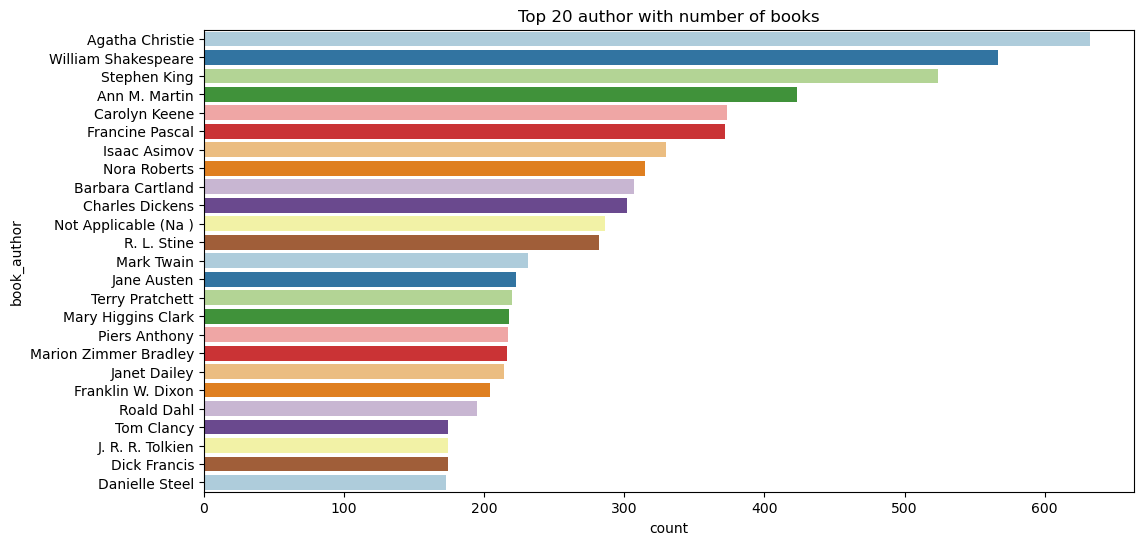

In [66]:
plt.figure(figsize=(12,6))
sns.countplot(y="book_author",palette = 'Paired', data=book_data,order=book_data['book_author'].value_counts().index[0:25])
plt.title("Top 25 author with number of books")

<h4>Analysis 2 : Which are top publishers with published books ?</h4>

Text(0.5, 1.0, 'Top 25 Publishers with number of books published')

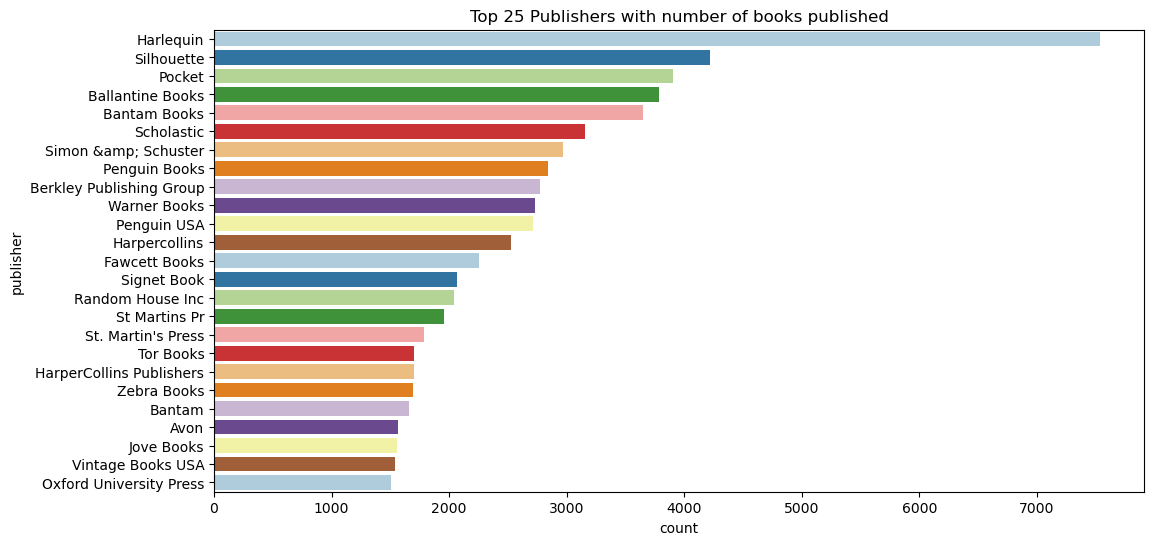

In [68]:
plt.figure(figsize=(12,6))
sns.countplot(y="publisher",palette = 'Paired', data=book_data,order=book_data['publisher'].value_counts().index[0:25])
plt.title("Top 25 Publishers with number of books published")

<h4>Analysis 3 : Number of Books published in yearly.</h4>



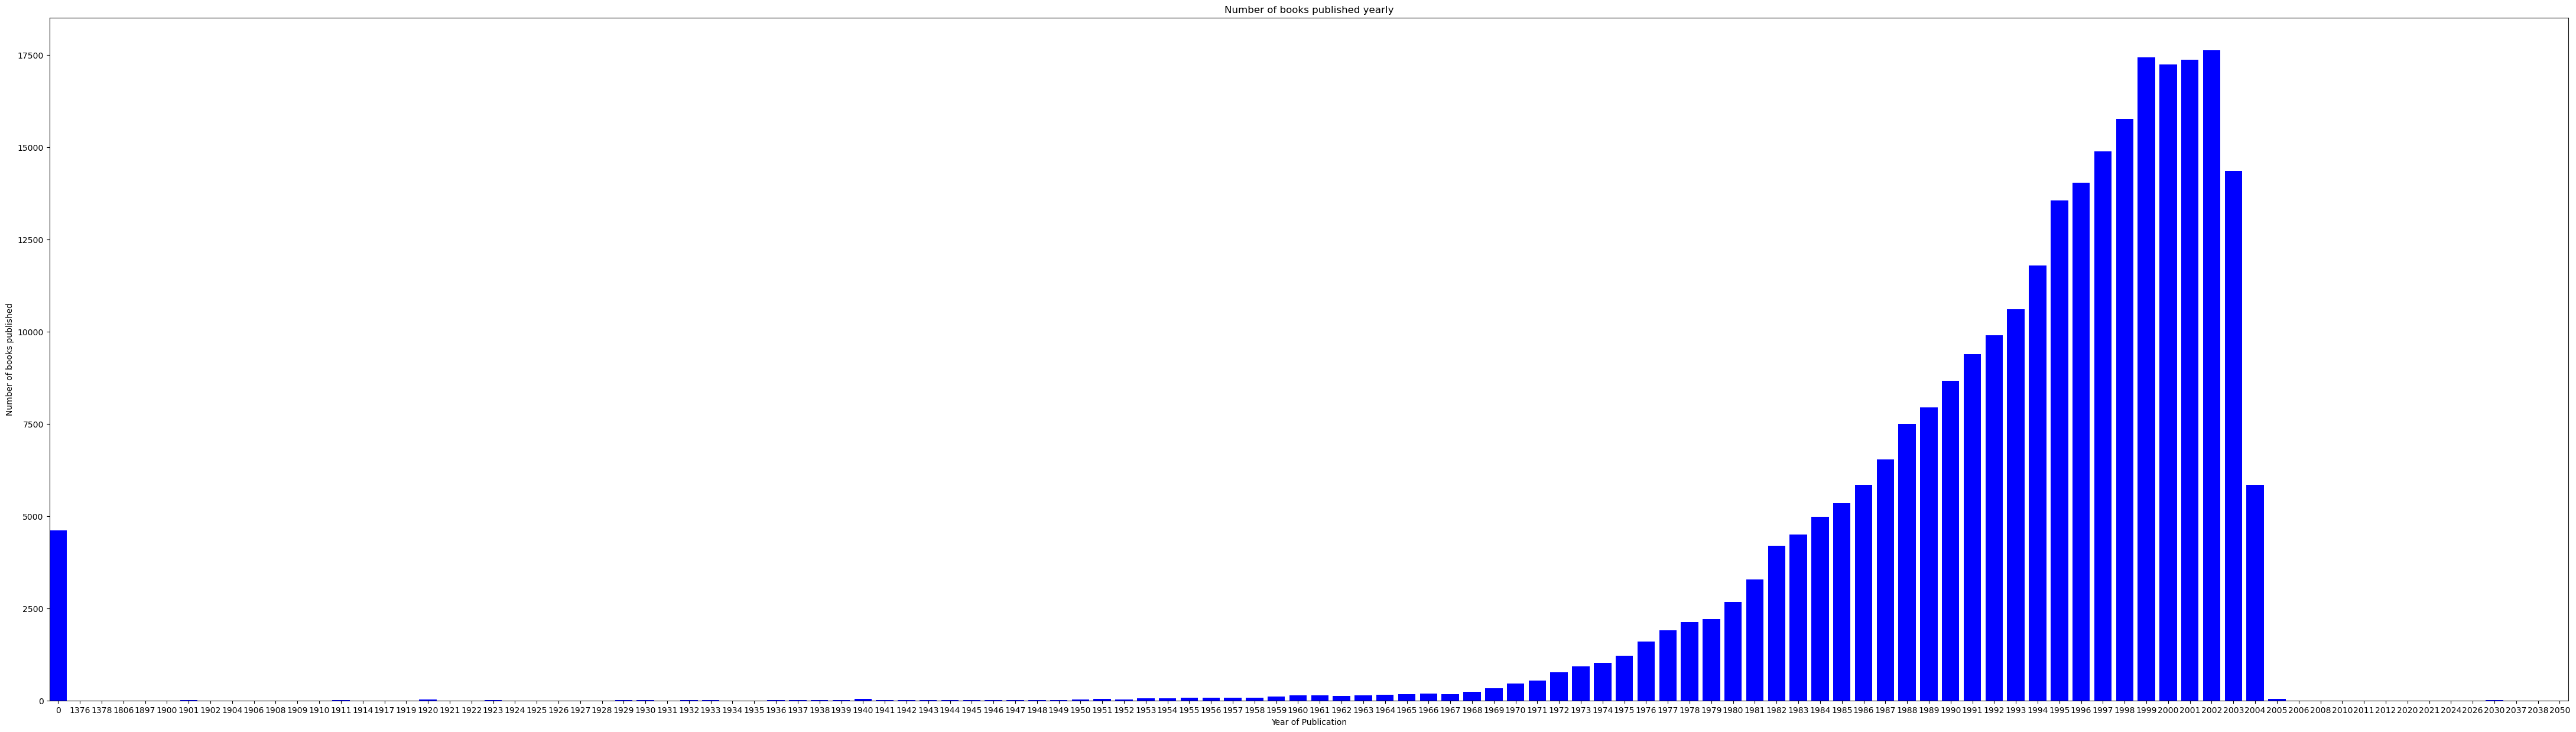

In [69]:
publications = {}
for year in book_data['year_of_publication']:
    if str(year) not in publications:
        publications[str(year)] = 0
    publications[str(year)] +=1

publications = {k:v for k, v in sorted(publications.items())}

fig = plt.figure(figsize =(55, 15))
plt.bar(list(publications.keys()),list(publications.values()), color = 'blue')
plt.ylabel("Number of books published")
plt.xlabel("Year of Publication")
plt.title("Number of books published yearly")
plt.margins(x = 0)
plt.show()

In [70]:
book_data.year_of_publication = pd.to_numeric(book_data.year_of_publication, errors='coerce')

# Checking for 0's or NaNs in Year of Publication
zero_year = book_data[book_data.year_of_publication == 0].year_of_publication.count()
nan_year = book_data.year_of_publication.isnull().sum()

print(f'There are {zero_year} entries as \'0\', and {nan_year} NaN entries in the Year of Publication field')

# Replace all years of zero with NaN
book_data.year_of_publication.replace(0, np.nan, inplace=True)

There are 4618 entries as '0', and 0 NaN entries in the Year of Publication field


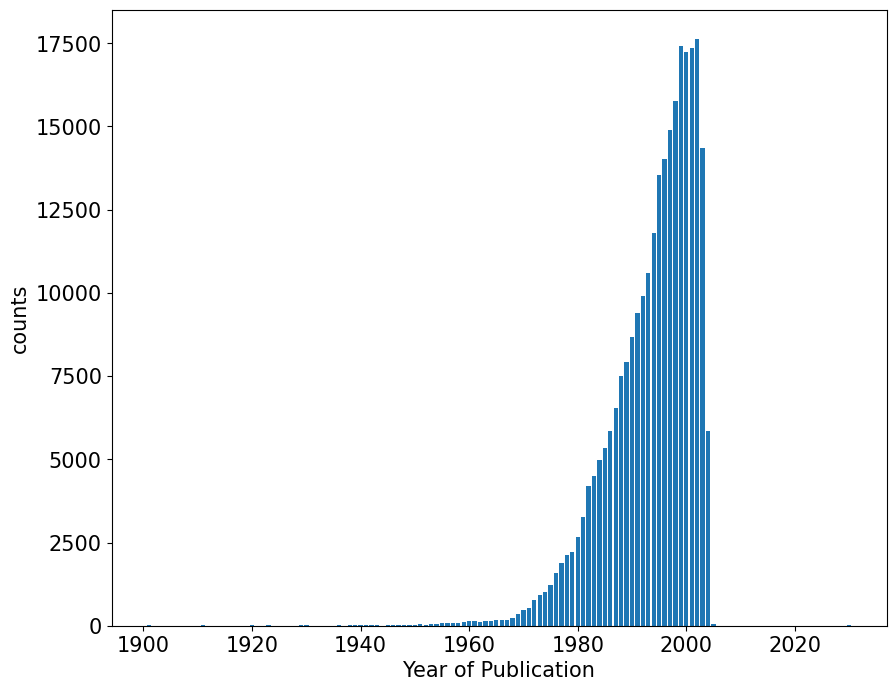

In [71]:
year = book_data.year_of_publication.value_counts().sort_index()
year = year.where(year>5) 
plt.figure(figsize=(10, 8))
plt.rcParams.update({'font.size': 15}) 
plt.bar(year.index, year.values)
plt.xlabel('Year of Publication')
plt.ylabel('counts')
plt.show()

<h2> User Data Analysis</h2>

<h4> Analysis 1 : Age Distribution of User Data</h4>

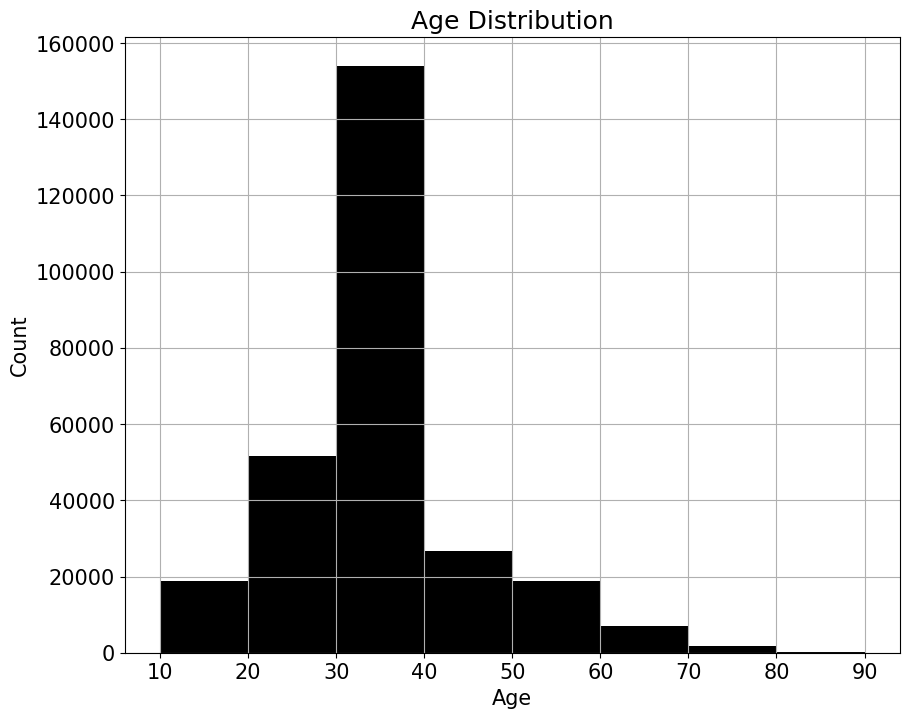

In [74]:
plt.figure(figsize=(10,8))
user_data.age.hist(bins=[10*i for i in range(1, 10)], color = 'Black')     
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

<h2> Rating Data Analysis</h4>

<h4> Analysis 1 :What are top 20 books as per number of ratings ?

</h4>

Text(0.5, 1.0, 'Top 10 books as per number of ratings')

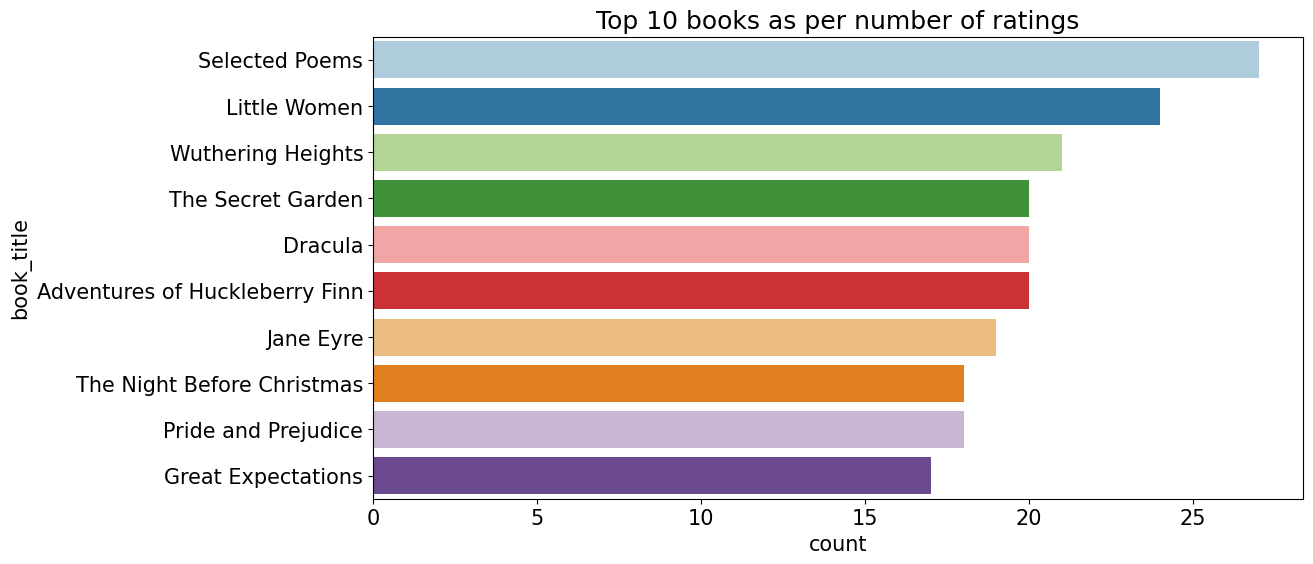

In [77]:
plt.figure(figsize=(12,6))
sns.countplot(y="book_title",palette = 'Paired',data= book_data, order=book_data['book_title'].value_counts().index[0:10])
plt.title("Top 10 books as per number of ratings")

<Axes: xlabel='book_rating', ylabel='count'>

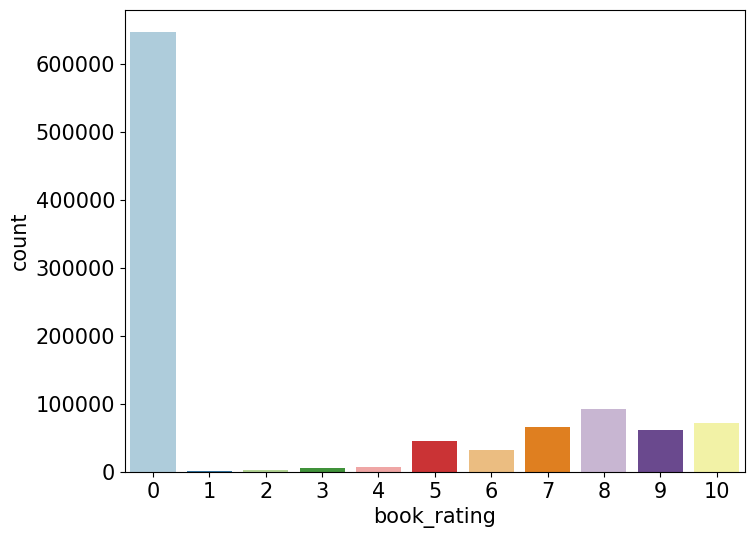

In [78]:
plt.figure(figsize=(8,6))
sns.countplot(x="book_rating",palette = 'Paired',data= unique_ratings)

Text(0.5, 1.0, 'Explicit Ratings')

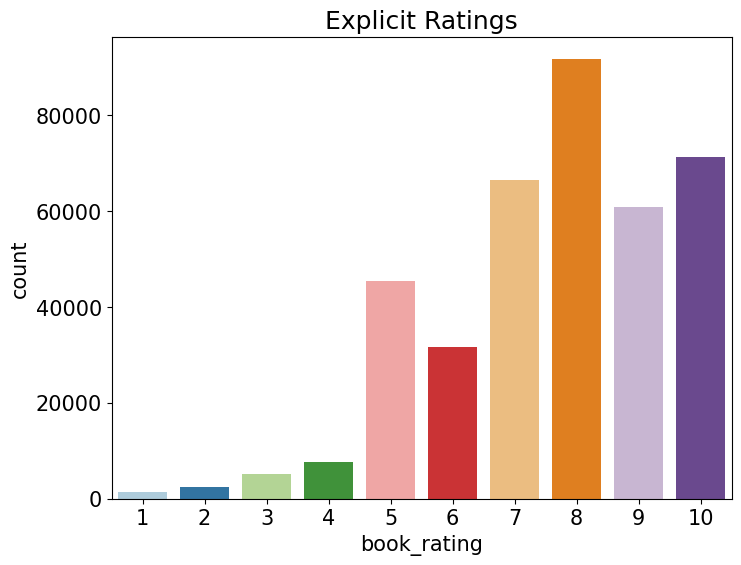

In [79]:
# Explicit Ratings
plt.figure(figsize=(8,6))
rate_data = unique_ratings[unique_ratings['book_rating'] != 0]
sns.countplot(x="book_rating",palette = 'Paired',data=rate_data)
plt.title("Explicit Ratings")

<h2>Recommendation System</h2>

In [80]:
ratings_explicit= unique_ratings[unique_ratings['book_rating'] != 0]   # explicit ratings represented by 1–10
ratings_implicit= unique_ratings[unique_ratings['book_rating'] == 0]   # implicit ratings represented by 0

In [81]:
ratings_explicit.head()


,user_id,isbn,book_rating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
8,276744,038550120X,7
16,276747,0060517794,9


In [82]:
print(unique_ratings.shape)
print(ratings_explicit.shape)

(1031136, 3)
(383842, 3)


<h3>Merging book_data dataset and ratings_explicit. Considering ISBNs that were explicitely rated for this recommendation system.</h3>



In [148]:
# Merging book_data dataset and ratings_explicit
new_book_df= pd.merge(book_data, ratings_explicit, on='isbn')
new_book_df.head()

,isbn,book_title,book_author,year_of_publication,publisher,user_id,book_rating
0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,8,5
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,11676,8
2,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,67544,8
3,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,116866,9
4,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,123629,9


In [149]:
new_book_df.drop(['user_id'],axis=1 ,inplace=True)

In [150]:
new_book_df

,isbn,book_title,book_author,year_of_publication,publisher,book_rating
0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,5
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,8
2,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,8
3,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,9
4,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,9
...,...,...,...,...,...,...
383837,0395264707,Dreamsnake,Vonda N. McIntyre,1978.0,Houghton Mifflin,10
383838,1845170423,Cocktail Classics,David Biggs,2004.0,Connaught,7
383839,0449906736,Flashpoints: Promise and Peril in a New World,Robin Wright,1993.0,Ballantine Books,5
383840,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988.0,Random House Childrens Pub (Mm),7


In [152]:
new_book_df['year_of_publication']  = new_book_df.year_of_publication.apply(lambda x: str(x))

In [153]:
new_book_df.year_of_publication.dtype

dtype('O')

In [154]:
new_book_df.book_rating.apply(lambda x: str(x))

0          5
1          8
2          8
3          9
4          9
          ..
383837    10
383838     7
383839     5
383840     7
383841     4
Name: book_rating, Length: 383842, dtype: object

In [155]:
new_book_df['book_rating']  = new_book_df.book_rating.apply(lambda x: str(x))

In [156]:
new_book_df['book_rating'] = new_book_df.book_rating.apply(lambda x: str(x))

In [169]:
new_book_df['tags']= new_book_df.isbn +' '+ new_book_df.book_title +' '+ new_book_df.book_author +' '+ new_book_df.year_of_publication + ' '+ new_book_df.book_rating

In [170]:
new_book_df

,isbn,book_title,book_author,year_of_publication,publisher,book_rating,tags
0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,5,0002005018 Clara Callan Richard Bruce Wright 2...
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,8,0002005018 Clara Callan Richard Bruce Wright 2...
2,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,8,0002005018 Clara Callan Richard Bruce Wright 2...
3,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,9,0002005018 Clara Callan Richard Bruce Wright 2...
4,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,9,0002005018 Clara Callan Richard Bruce Wright 2...
...,...,...,...,...,...,...,...
383837,0395264707,Dreamsnake,Vonda N. McIntyre,1978.0,Houghton Mifflin,10,0395264707 Dreamsnake Vonda N. McIntyre 1978.0 10
383838,1845170423,Cocktail Classics,David Biggs,2004.0,Connaught,7,1845170423 Cocktail Classics David Biggs 2004.0 7
383839,0449906736,Flashpoints: Promise and Peril in a New World,Robin Wright,1993.0,Ballantine Books,5,0449906736 Flashpoints: Promise and Peril in a...
383840,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988.0,Random House Childrens Pub (Mm),7,0440400988 There's a Bat in Bunk Five Paula Da...


In [171]:
new_book_df.year_of_publication.apply(lambda x: str(x))

0         2001.0
1         2001.0
2         2001.0
3         2001.0
4         2001.0
           ...  
383837    1978.0
383838    2004.0
383839    1993.0
383840    1988.0
383841    1991.0
Name: year_of_publication, Length: 383842, dtype: object

In [172]:
print(new_book_df.shape)

(383842, 7)


In [173]:
new_book_df['book_title'].count()

383842

In [174]:
new_book_df['book_title'].nunique()

135567

<h3> Top Ten books as per Book Ratings and Recommendation</h3>

In [175]:
top_ten_books= pd.DataFrame(new_book_df.groupby('book_title')['book_rating'].count()
                         .sort_values(ascending=False).head(10))
print('The top ten books as per ratings : ')
top_ten_books

The top ten books as per ratings : 


,book_rating
book_title,
The Lovely Bones: A Novel,707
Wild Animus,581
The Da Vinci Code,494
The Secret Life of Bees,406
The Nanny Diaries: A Novel,393
The Red Tent (Bestselling Backlist),383
Bridget Jones's Diary,377
A Painted House,366
Life of Pi,336


<h2>Cosine Similarity Based Recommendation System</h2>

In [166]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ABC\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [176]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [177]:
new_book_df['tags'][0]

'0002005018 Clara Callan Richard Bruce Wright 2001.0 5'

In [206]:
def stem(text):
    y=[]
    z = []
    try:
        for i in text.split(' '):
            y.append(ps.stem(i))
        return " ".join(y)
    except:
        z.append(i)

In [210]:
new_book_df.dropna(inplace=True)

In [211]:
new_book_df['tags'] = new_book_df['tags'].apply(stem)


In [212]:
new_book_df['tags']

0         0002005018 clara callan richard bruce wright 2...
1         0002005018 clara callan richard bruce wright 2...
2         0002005018 clara callan richard bruce wright 2...
3         0002005018 clara callan richard bruce wright 2...
4         0002005018 clara callan richard bruce wright 2...
                                ...                        
383837      0395264707 dreamsnak vonda n. mcintyr 1978.0 10
383838      1845170423 cocktail classic david bigg 2004.0 7
383839    0449906736 flashpoints: promi and peril in a n...
383840    0440400988 there' a bat in bunk five paula dan...
383841    0525447644 from one to one hundr teri sloat 19...
Name: tags, Length: 383840, dtype: object

In [220]:
# Bag of Words 
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer(max_features=5000, stop_words='english',binary=True)

In [ ]:
vectors = cv.fit_transform(new_book_df['tags']).toarray()
vectors.shape

In [216]:
from sklearn.metrics.pairwise import cosine_similarity

In [219]:
x = ratings_with_name.groupby('User-ID').count()['Book-Rating'] > 200
padhe_likhe_users = x[x].index

383840